In [1]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 7.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyli

In [2]:
import easyocr
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
# Function to read image from URL and convert to RGB
def imread_from_url(url):
    response = requests.get(url)
    response.raise_for_status()  # Check if the request was successful
    image_array = np.array(bytearray(response.content), dtype=np.uint8)
    image_bgr = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    return image_rgb

In [4]:
# Use the function to load an image from a URL
url = 'https://cdn.bannerbuzz.com/media/catalog/product/resize/650/b/b/bbcomps6611_bb_03.jpg'
image = imread_from_url(url)

In [5]:
# instance text detector
reader = easyocr.Reader(['en'], gpu=False)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [6]:
# detect text on image
text_ = reader.readtext(image=image)

In [7]:
text_

[([[274, 122], [378, 122], [378, 174], [274, 174]],
  'STOP',
  0.9984487891197205),
 ([[281, 167], [371, 167], [371, 203], [281, 203]],
  'NOT AN',
  0.9705528607883487),
 ([[282, 196], [372, 196], [372, 250], [282, 250]],
  'EXIT',
  0.9916059970855713),
 ([[275, 246], [375, 246], [375, 298], [275, 298]],
  'PARE',
  0.9999540448188782),
 ([[257, 289], [393, 289], [393, 329], [257, 329]],
  'NO ES UNA',
  0.7848335513921935),
 ([[258, 320], [394, 320], [394, 372], [258, 372]],
  'SALIDA',
  0.9998404667510584)]

In [8]:
threshold = 0.25

In [9]:
# draw bbox and text
for t_, t in enumerate(text_):
    print(t)

    bbox, text, score = t

    if score > threshold:
        cv2.rectangle(image, bbox[0], bbox[2], (0, 255, 0), 3)
        cv2.putText(image, text, bbox[0], cv2.FONT_HERSHEY_COMPLEX, 0.65, (0, 0, 255), 2)

([[274, 122], [378, 122], [378, 174], [274, 174]], 'STOP', 0.9984487891197205)
([[281, 167], [371, 167], [371, 203], [281, 203]], 'NOT AN', 0.9705528607883487)
([[282, 196], [372, 196], [372, 250], [282, 250]], 'EXIT', 0.9916059970855713)
([[275, 246], [375, 246], [375, 298], [275, 298]], 'PARE', 0.9999540448188782)
([[257, 289], [393, 289], [393, 329], [257, 329]], 'NO ES UNA', 0.7848335513921935)
([[258, 320], [394, 320], [394, 372], [258, 372]], 'SALIDA', 0.9998404667510584)


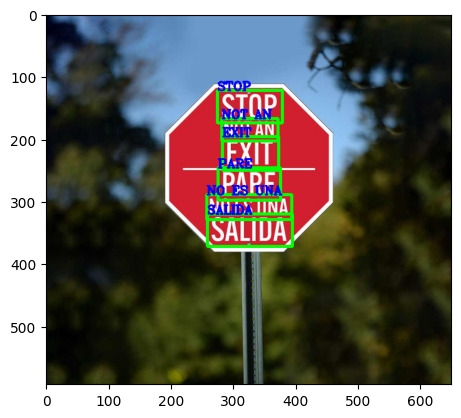

In [10]:
plt.imshow(image)